In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize

(3, 300, 300)


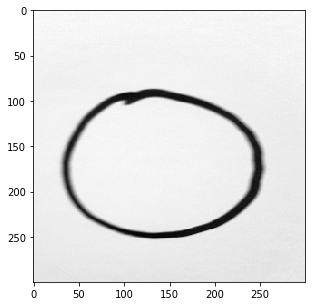

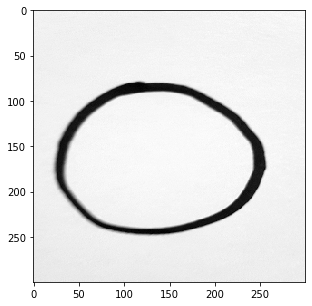

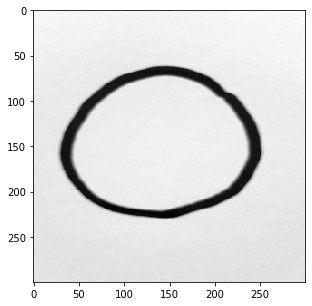

In [27]:
X_train = np.load('X_train.npy',allow_pickle = True)
y_train = np.load('y_train.npy',  allow_pickle = True)
images_processed = []
k = [19,72,89]
for i in k:
    image = X_train[i]
    image = cv2.convertScaleAbs(image, alpha=(255.0))
    #cv2.imwrite('C:\\Users\\divyc\\Downloads\\ML\\MLPROJ2020\\TrainImages\\train'+str(i)+'.png',image)
    cv2.imwrite('train'+str(i)+'.png',image)
    #img = cv2.imread('C:\\Users\\divyc\\Downloads\\ML\\MLPROJ2020\\TrainImages\\train'+str(i)+'.png',0)
    img = cv2.imread('train'+str(i)+'.png',0)
    img = filterImage(img)
    blur = cv2.GaussianBlur(img,(3,3),0)
    ret1,threshImage = cv2.threshold(blur,150,255,cv2.THRESH_BINARY_INV)
    kernel = np.ones((5,5), np.uint8)
    finalImage = cv2.dilate(threshImage, kernel, iterations=1)
    images_processed.append(finalImage)
images_processed = np.array(images_processed)
np.save('editX_train', images_processed)   

In [14]:
def filterImage(img):
    rgb_planes = cv2.split(img)
    result_planes = []
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 51)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_planes.append(diff_img)
        result_norm_planes.append(norm_img)
    result = cv2.merge(result_planes)
    result_norm = cv2.merge(result_norm_planes)
    return result_norm
